# Project Delay Prediction Models

**BO**: Reduce Project Delays

**DSO**: Predict Project Delays  

**Models to implement**:
1. **Decision Tree**
2. **XGBoost**
3. **SVM**


## 1. Import Libraries

In [ ]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# SVM (optional)
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc

# Set random seed for reproducibility
np.random.seed(42)

## 2. Load and Explore the Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('modified_project_management_dataset.csv')

# Display the first few rows
df.head()

,Project ID,Project Name,Project Type,Start Date,End Date,Project Status,Priority,Task ID,Task Name,Task Status,Assigned To,Hours Spent,Progress
0,P001,Renovation of a School Project 001,Renovation,21/07/2024,08/08/2024,Behind,Medium,T001,Task 001 of Renovation of a School Project 001,In Progress,Bob,12,0.24
1,P001,Renovation of a School Project 001,Renovation,21/07/2024,12/08/2024,Behind,High,T002,Task 002 of Renovation of a School Project 001,In Progress,Charlie,4,0.56
2,P001,Renovation of a School Project 001,Renovation,21/07/2024,10/08/2024,Behind,High,T003,Task 003 of Renovation of a School Project 001,Completed,Charlie,5,1.00
3,P002,Innovation of a Classroom Project 002,Innovation,04/06/2024,12/07/2025,On Track,High,T001,Task 001 of Innovation of a Classroom Project 002,Pending,Charlie,24,0.33
4,P002,Innovation of a Classroom Project 002,Innovation,04/06/2024,26/06/2025,On Track,Medium,T002,Task 002 of Innovation of a Classroom Project 002,Pending,Charlie,26,0.32


In [ ]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Project ID      300 non-null    object 
 1   Project Name    300 non-null    object 
 2   Project Type    300 non-null    object 
 3   Start Date      300 non-null    object 
 4   End Date        300 non-null    object 
 5   Project Status  300 non-null    object 
 6   Priority        300 non-null    object 
 7   Task ID         300 non-null    object 
 8   Task Name       300 non-null    object 
 9   Task Status     300 non-null    object 
 10  Assigned To     300 non-null    object 
 11  Hours Spent     300 non-null    int64  
 12  Progress        300 non-null    float64
 13  Target_Binary   300 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 32.9+ KB


In [ ]:
# Check for missing values
df.isnull().sum()

Project ID        0
Project Name      0
Project Type      0
Start Date        0
End Date          0
Project Status    0
Priority          0
Task ID           0
Task Name         0
Task Status       0
Assigned To       0
Hours Spent       0
Progress          0
Target_Binary     0
dtype: int64

In [ ]:
# Summary statistics
df.describe()

,Hours Spent,Progress,Target_Binary
count,300.000000,300.000000,300.000000
mean,19.210000,0.636067,-0.240000
std,11.505382,0.336683,0.827455
min,0.000000,0.000000,-1.000000
25%,10.000000,0.352500,-1.000000
50%,18.500000,0.680000,0.000000
75%,29.000000,1.000000,0.250000
max,40.000000,1.000000,1.000000


In [ ]:
# Check unique values in Project Status
df['Project Status'].value_counts()

Project Status
Behind       87
Completed    78
On Track     75
On Hold      60
Name: count, dtype: int64

In [ ]:
# Check unique values in Project Type
df['Project Type'].value_counts()

Project Type
Other             99
Renovation        78
Construction      60
Innovation        21
Infrastructure    21
Maintenance       21
Name: count, dtype: int64

In [ ]:
# Check unique values in Priority
df['Priority'].value_counts()

Priority
High      156
Medium     91
Low        53
Name: count, dtype: int64

## 3. Data Visualization

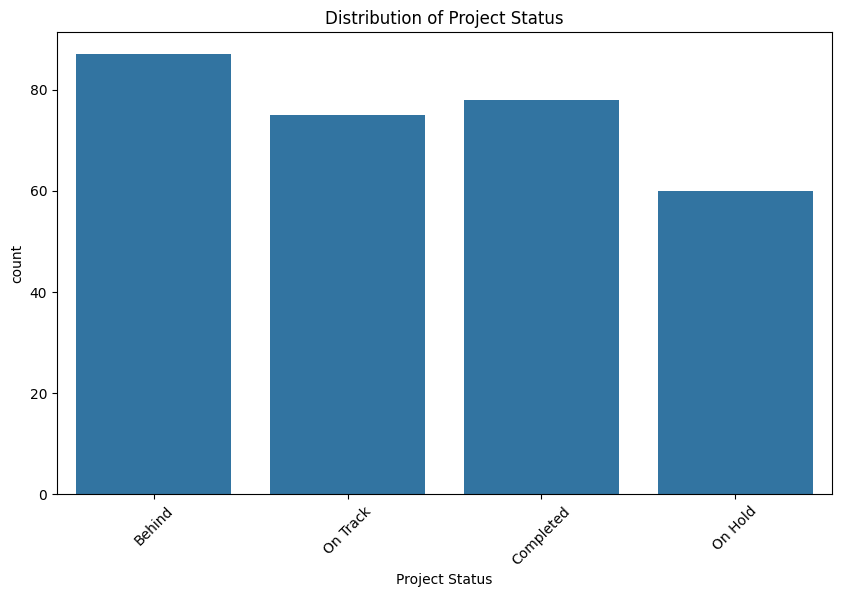

In [ ]:
# Visualize the distribution of Project Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Project Status', data=df)
plt.title('Distribution of Project Status')
plt.xticks(rotation=45)
plt.show()

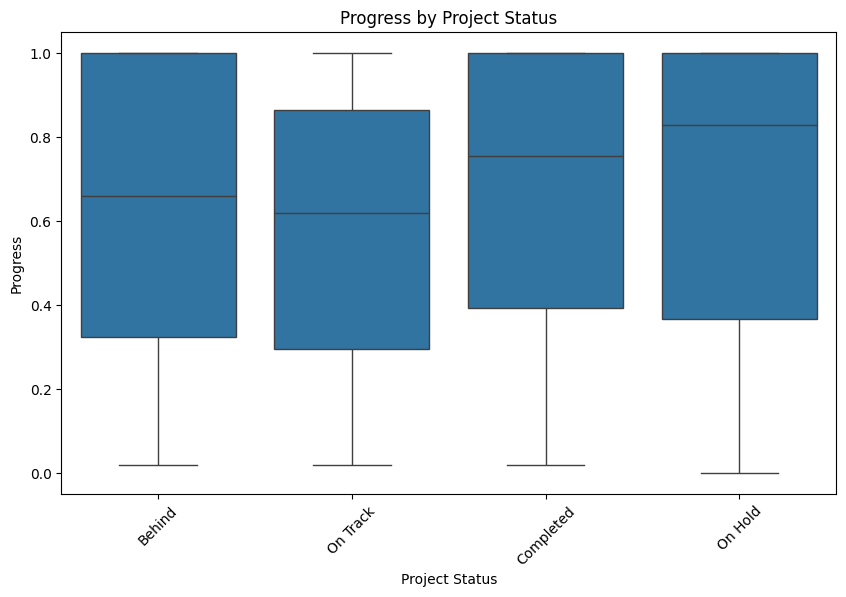

In [ ]:
# Visualize the relationship between Progress and Project Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Project Status', y='Progress', data=df)
plt.title('Progress by Project Status')
plt.xticks(rotation=45)
plt.show()

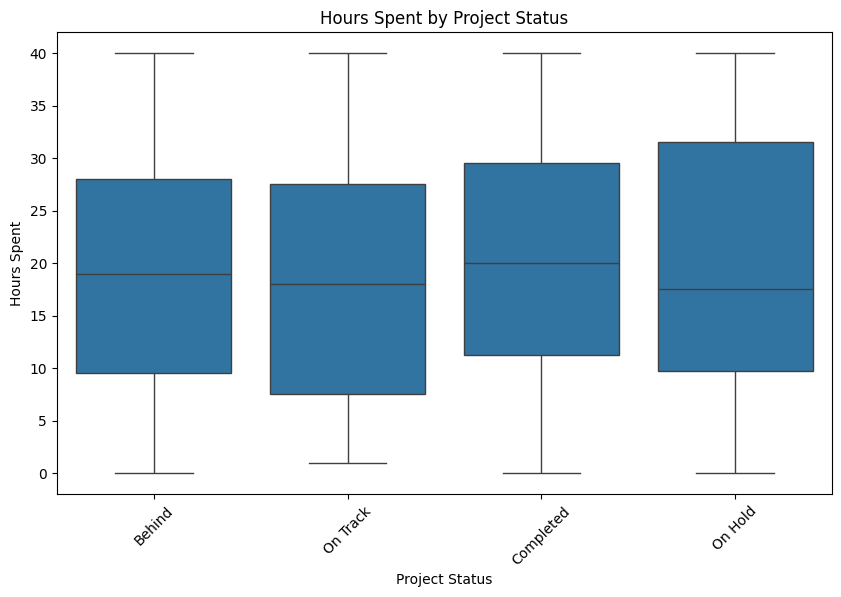

In [ ]:
# Visualize the relationship between Hours Spent and Project Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Project Status', y='Hours Spent', data=df)
plt.title('Hours Spent by Project Status')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

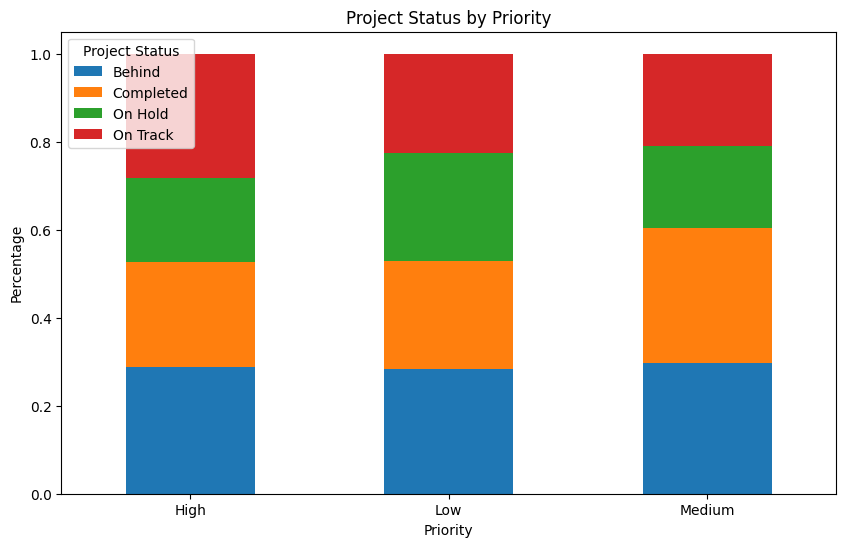

In [ ]:
# Visualize the relationship between Priority and Project Status
plt.figure(figsize=(10, 6))
priority_status = pd.crosstab(df['Priority'], df['Project Status'])
priority_status_pct = priority_status.div(priority_status.sum(axis=1), axis=0)
priority_status_pct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Project Status by Priority')
plt.xlabel('Priority')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

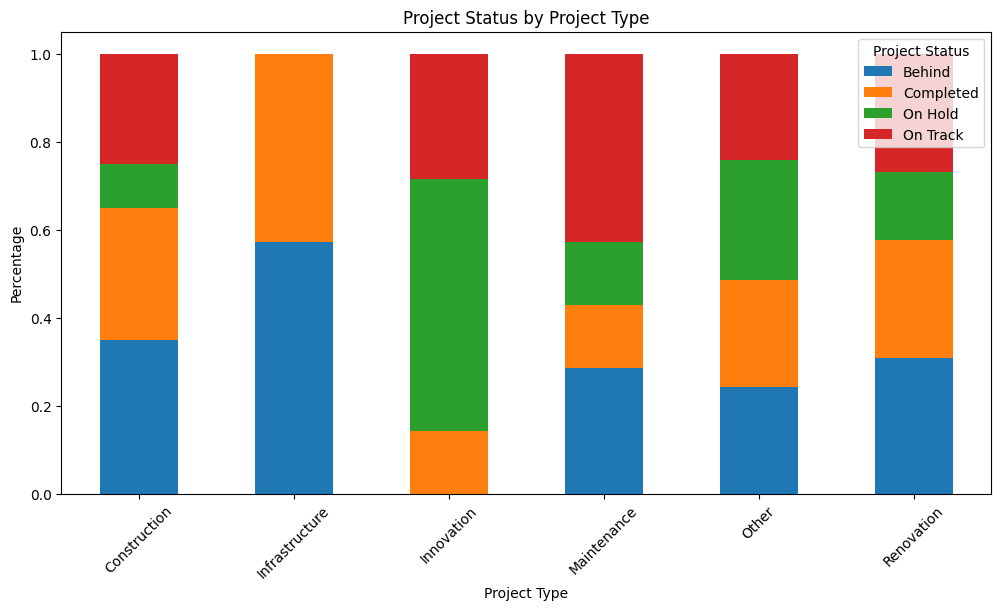

In [ ]:
# Visualize the relationship between Project Type and Project Status
plt.figure(figsize=(12, 6))
project_type_status = pd.crosstab(df['Project Type'], df['Project Status'])
project_type_status_pct = project_type_status.div(project_type_status.sum(axis=1), axis=0)
project_type_status_pct.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Project Status by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

## 4. Data Preprocessing

In [ ]:
# Create a binary target variable (On Track vs Behind/On Hold)
df['Target_Binary'] = df['Project Status'].apply(lambda x: 1 if x == 'On Track' else 0 if x == 'Completed' else -1)

# Filter out completed projects for delay prediction (they're already done)
df_active = df[df['Project Status'] != 'Completed']

# Create a binary target for active projects (On Track vs Behind/On Hold)
df_active['Target_Binary'] = df_active['Project Status'].apply(lambda x: 1 if x == 'On Track' else 0)

# Display the distribution of the binary target
df_active['Target_Binary'].value_counts()

C:\Users\USER\AppData\Local\Temp\ipykernel_8532\243410009.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['Target_Binary'] = df_active['Project Status'].apply(lambda x: 1 if x == 'On Track' else 0)


Target_Binary
0    147
1     75
Name: count, dtype: int64

In [ ]:
# Encode categorical variables
# Priority: Low, Medium, High
priority_encoder = LabelEncoder()
df_active['Priority_Encoded'] = priority_encoder.fit_transform(df_active['Priority'])

project_type_encoder = OneHotEncoder(sparse_output=False, drop='first')
project_type_encoded = project_type_encoder.fit_transform(df_active[['Project Type']])
project_type_df = pd.DataFrame(project_type_encoded, 
                              columns=[f'Project_Type_{i}' for i in range(project_type_encoded.shape[1])])
df_active = pd.concat([df_active.reset_index(drop=True), project_type_df], axis=1)

# Display the encoded values for Priority
print("Priority Encoding:")
for i, category in enumerate(priority_encoder.classes_):
    print(f"{category}: {i}")

# Display the encoded Project Types
print("\nProject Type Encoding:")
print(f"Reference category: {project_type_encoder.categories_[0][0]}")
for i, category in enumerate(project_type_encoder.categories_[0][1:]):
    print(f"{category}: Project_Type_{i}")

Priority Encoding:
High: 0
Low: 1
Medium: 2

Project Type Encoding:
Reference category: Construction
Infrastructure: Project_Type_0
Innovation: Project_Type_1
Maintenance: Project_Type_2
Other: Project_Type_3
Renovation: Project_Type_4


C:\Users\USER\AppData\Local\Temp\ipykernel_8532\3175772724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['Priority_Encoded'] = priority_encoder.fit_transform(df_active['Priority'])


In [ ]:
# Prepare features for modeling
project_type_cols = [col for col in df_active.columns if col.startswith('Project_Type_')]

features = ['Progress', 'Hours Spent', 'Priority_Encoded'] + project_type_cols
X = df_active[features]
y = df_active['Target_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Feature names: {features}")

Training set shape: (155, 8)
Testing set shape: (67, 8)
Feature names: ['Progress', 'Hours Spent', 'Priority_Encoded', 'Project_Type_0', 'Project_Type_1', 'Project_Type_2', 'Project_Type_3', 'Project_Type_4']


## 5. Decision Tree Model



Decision Tree Accuracy: 0.4478

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.55      0.56        44
           1       0.23      0.26      0.24        23

    accuracy                           0.45        67
   macro avg       0.41      0.40      0.40        67
weighted avg       0.46      0.45      0.45        67



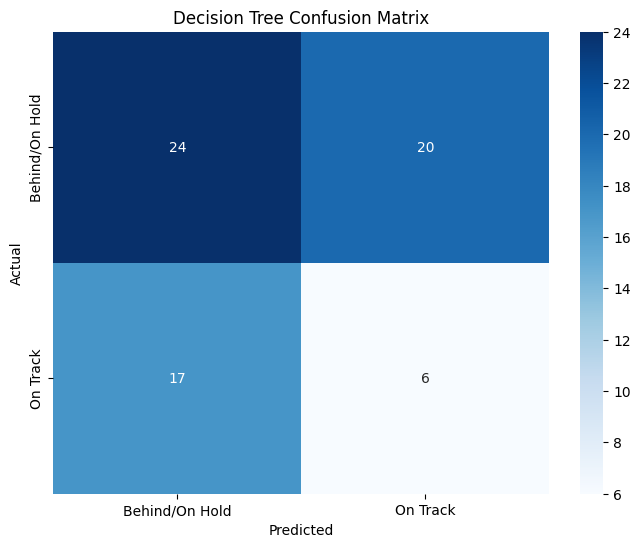

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Behind/On Hold', 'On Track'],
            yticklabels=['Behind/On Hold', 'On Track'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

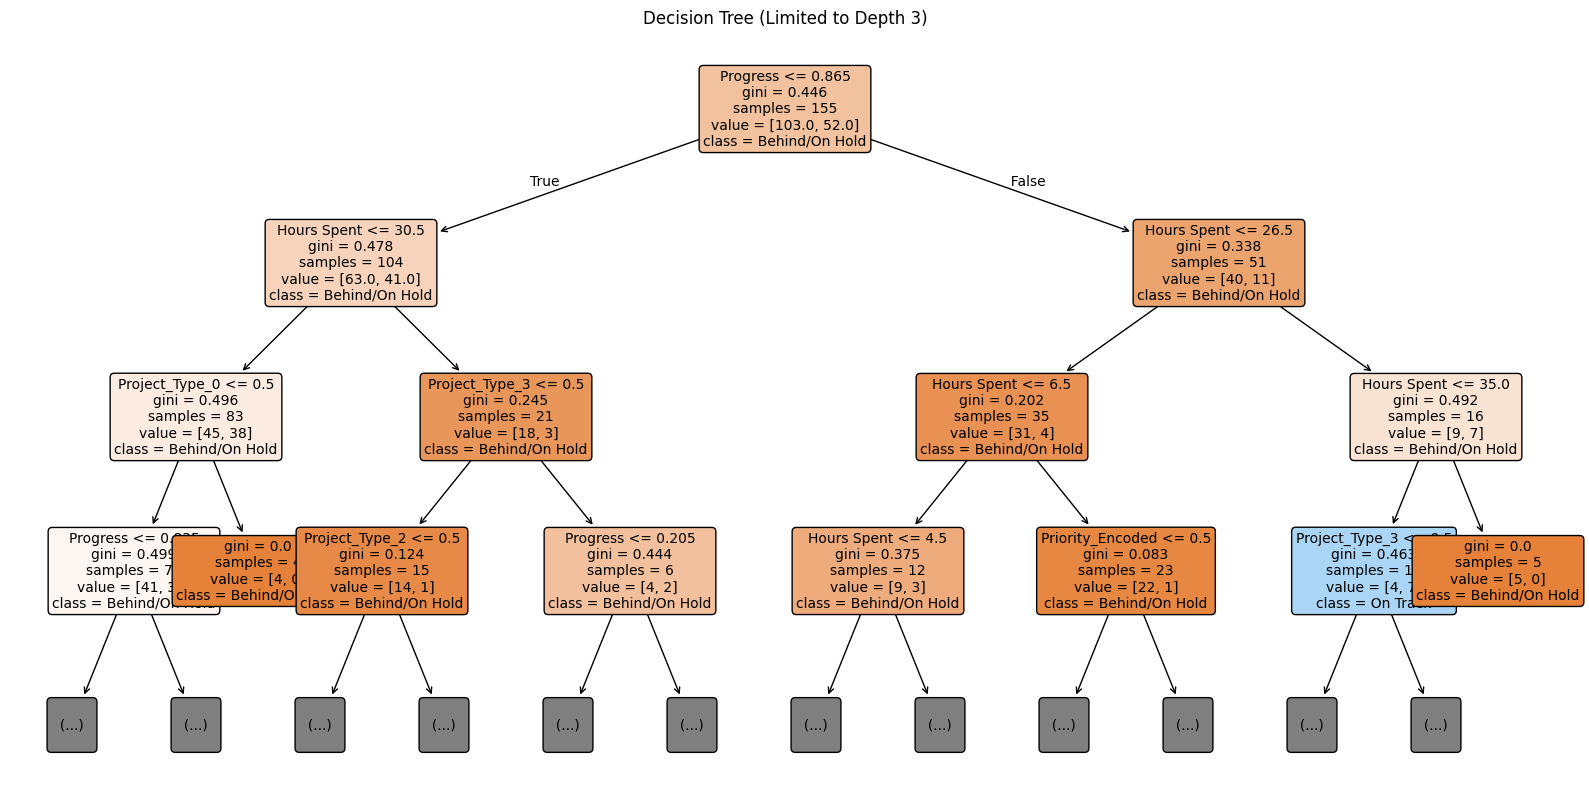

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, max_depth=3, feature_names=features, 
          class_names=['Behind/On Hold', 'On Track'], 
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree (Limited to Depth 3)')
plt.show()

In [ ]:
# the decision rules
tree_rules = export_text(dt_model, feature_names=features)
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- Progress <= 0.87
|   |--- Hours Spent <= 30.50
|   |   |--- Project_Type_0 <= 0.50
|   |   |   |--- Progress <= 0.84
|   |   |   |   |--- Priority_Encoded <= 1.50
|   |   |   |   |   |--- Progress <= 0.71
|   |   |   |   |   |   |--- Hours Spent <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Hours Spent >  1.50
|   |   |   |   |   |   |   |--- Hours Spent <= 6.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Hours Spent >  6.50
|   |   |   |   |   |   |   |   |--- Progress <= 0.09
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Progress >  0.09
|   |   |   |   |   |   |   |   |   |--- Progress <= 0.64
|   |   |   |   |   |   |   |   |   |   |--- Progress <= 0.35
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- Progress >  0.35
|   |   |   |   |   |   |   |   |   |   |   |--- truncated b

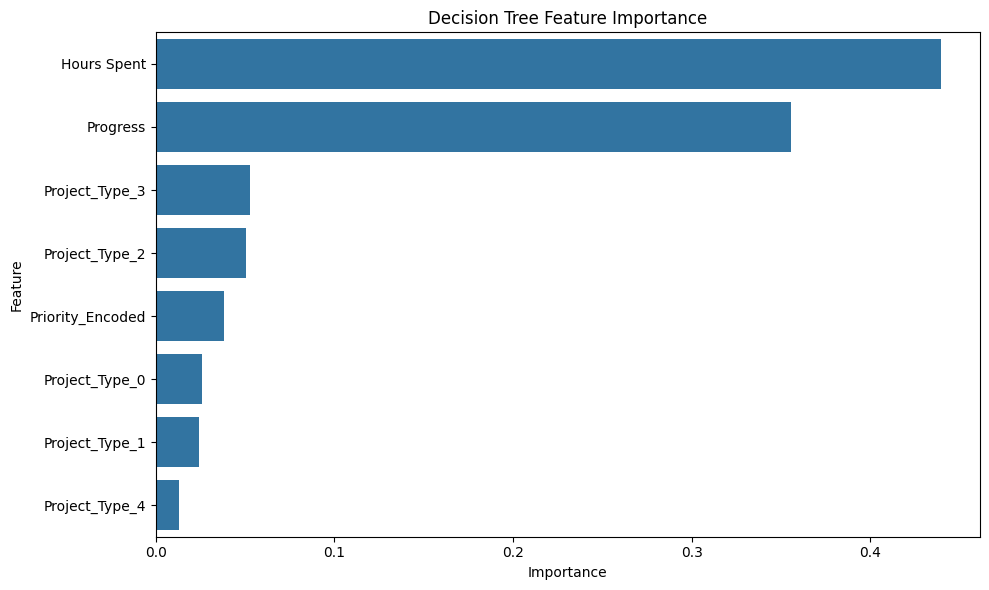

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Use the best model
best_dt_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate the best model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"\nBest Decision Tree Model Accuracy: {accuracy_best_dt:.4f}")

# Classification report for the best model
print("\nClassification Report for Best Decision Tree Model:")
print(classification_report(y_test, y_pred_best_dt))

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation score: 0.6516

Best Decision Tree Model Accuracy: 0.4925

Classification Report for Best Decision Tree Model:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        44
           1       0.26      0.26      0.26        23

    accuracy                           0.49        67
   macro avg       0.44      0.44      0.44        67
weighted avg       0.49      0.49      0.49        67



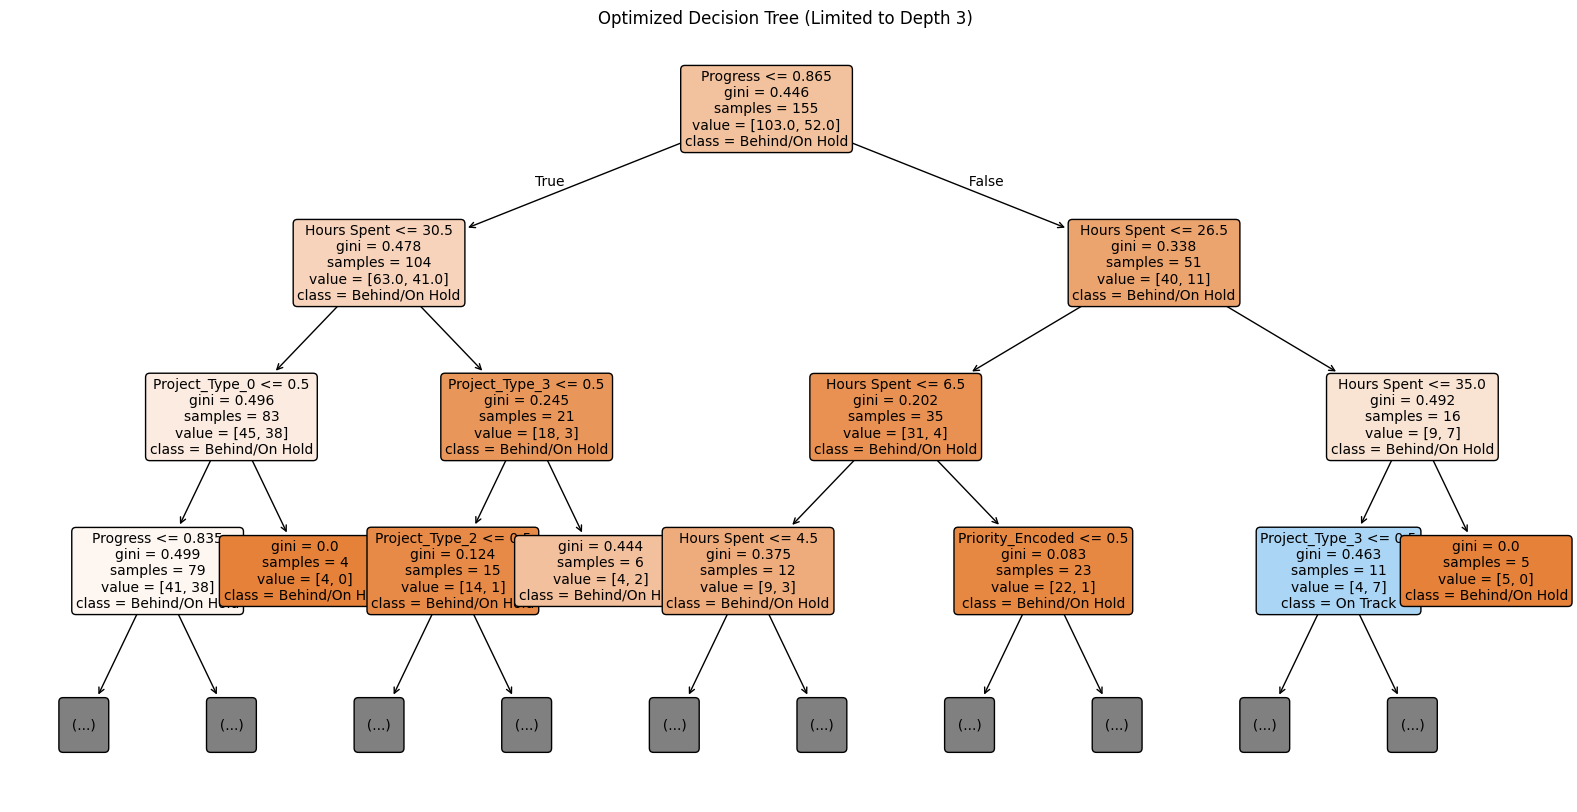

In [ ]:
# Visualize the optimized Decision Tree (limited to max_depth=3 for better visualization)
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, max_depth=3, feature_names=features, 
          class_names=['Behind/On Hold', 'On Track'], 
          filled=True, rounded=True, fontsize=10)
plt.title('Optimized Decision Tree (Limited to Depth 3)')
plt.show()

## 6. XGBoost Model



c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:45:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.4627

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.57      0.58        44
           1       0.24      0.26      0.25        23

    accuracy                           0.46        67
   macro avg       0.42      0.41      0.42        67
weighted avg       0.47      0.46      0.47        67



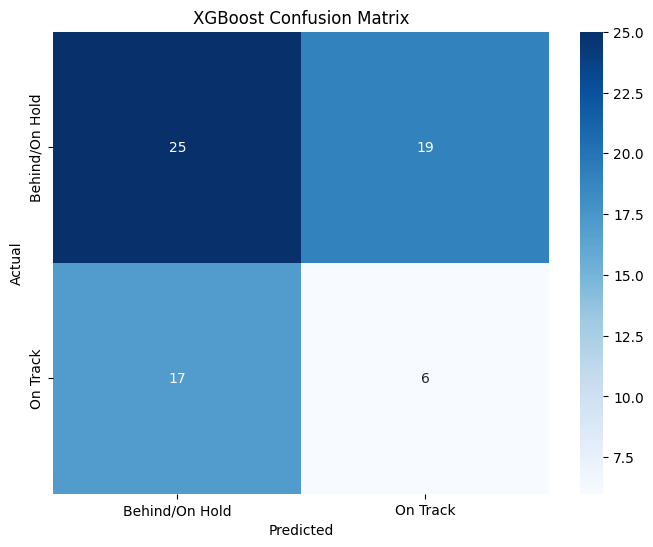

In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Behind/On Hold', 'On Track'],
            yticklabels=['Behind/On Hold', 'On Track'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

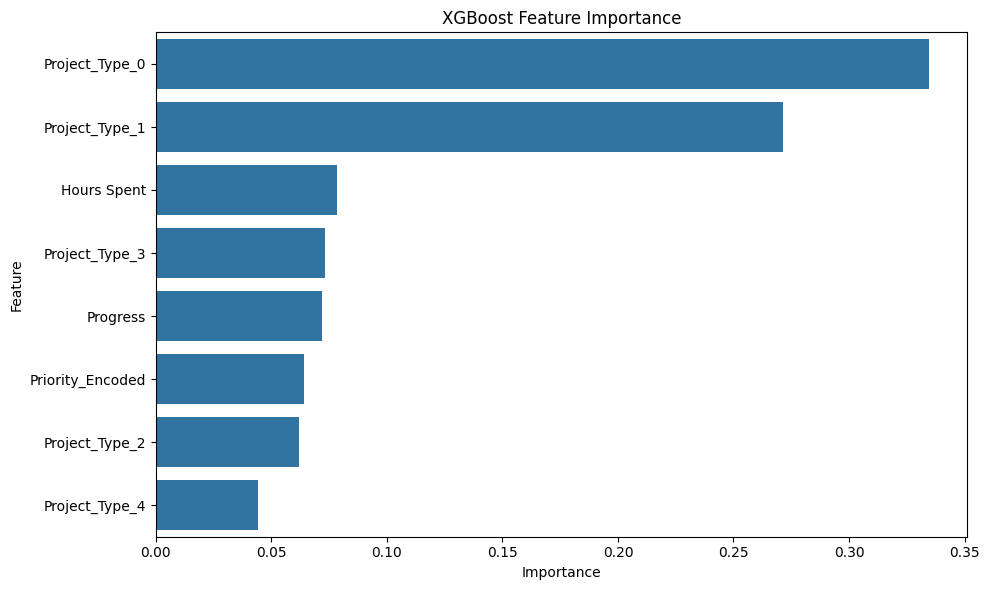

In [ ]:
# Feature importance for XGBoost
xgb_feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_model.feature_importances_
})
xgb_feature_importance = xgb_feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), 
                          param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Use the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"\nBest XGBoost Model Accuracy: {accuracy_best_xgb:.4f}")

# Classification report for the best model
print("\nClassification Report for Best XGBoost Model:")
print(classification_report(y_test, y_pred_best_xgb))

c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:45:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:45:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:45:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:45:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best cross-validation score: 0.6710

Best XGBoost Model Accuracy: 0.6567

Classification Report for Best XGBoost Model:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        44
           1       0.00      0.00      0.00        23

    accuracy                           0.66        67
   macro avg       0.33      0.50      0.40        67
weighted avg       0.43      0.66      0.52        67



c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:45:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:45:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precis

## 7. SVM Model



SVM Accuracy: 0.6269

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.95      0.77        44
           1       0.00      0.00      0.00        23

    accuracy                           0.63        67
   macro avg       0.32      0.48      0.39        67
weighted avg       0.42      0.63      0.51        67



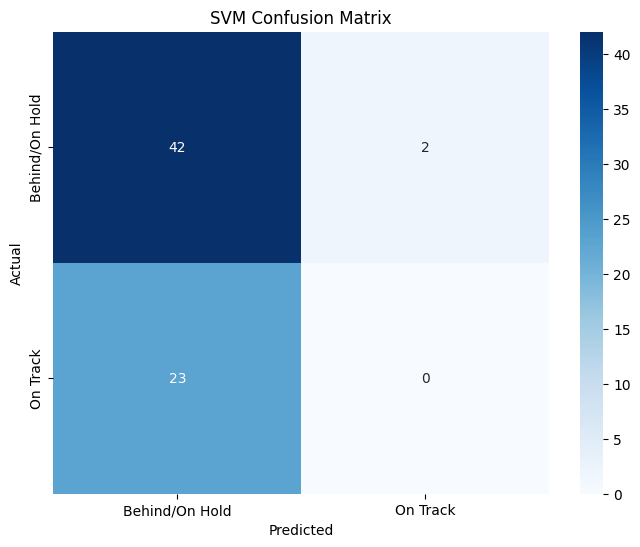

In [ ]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Behind/On Hold', 'On Track'],
            yticklabels=['Behind/On Hold', 'On Track'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

In [ ]:
# Hyperparameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Use the best model
best_svm_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_svm = best_svm_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"\nBest SVM Model Accuracy: {accuracy_best_svm:.4f}")

# Classification report for the best model
print("\nClassification Report for Best SVM Model:")
print(classification_report(y_test, y_pred_best_svm))

Best parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.6645

Best SVM Model Accuracy: 0.6567

Classification Report for Best SVM Model:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        44
           1       0.00      0.00      0.00        23

    accuracy                           0.66        67
   macro avg       0.33      0.50      0.40        67
weighted avg       0.43      0.66      0.52        67



c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 8. Model Comparison and Evaluation

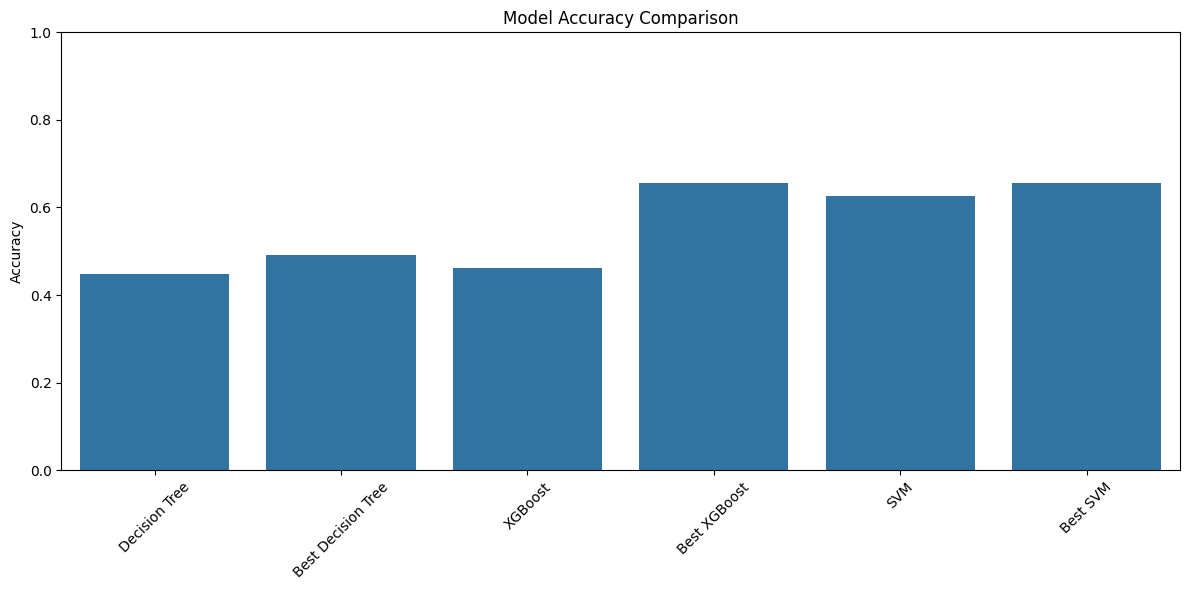

In [ ]:
# Compare model performance
models = ['Decision Tree', 'Best Decision Tree', 'XGBoost', 'Best XGBoost', 'SVM', 'Best SVM']
accuracies = [accuracy_dt, accuracy_best_dt, accuracy_xgb, accuracy_best_xgb, accuracy_svm, accuracy_best_svm]

plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

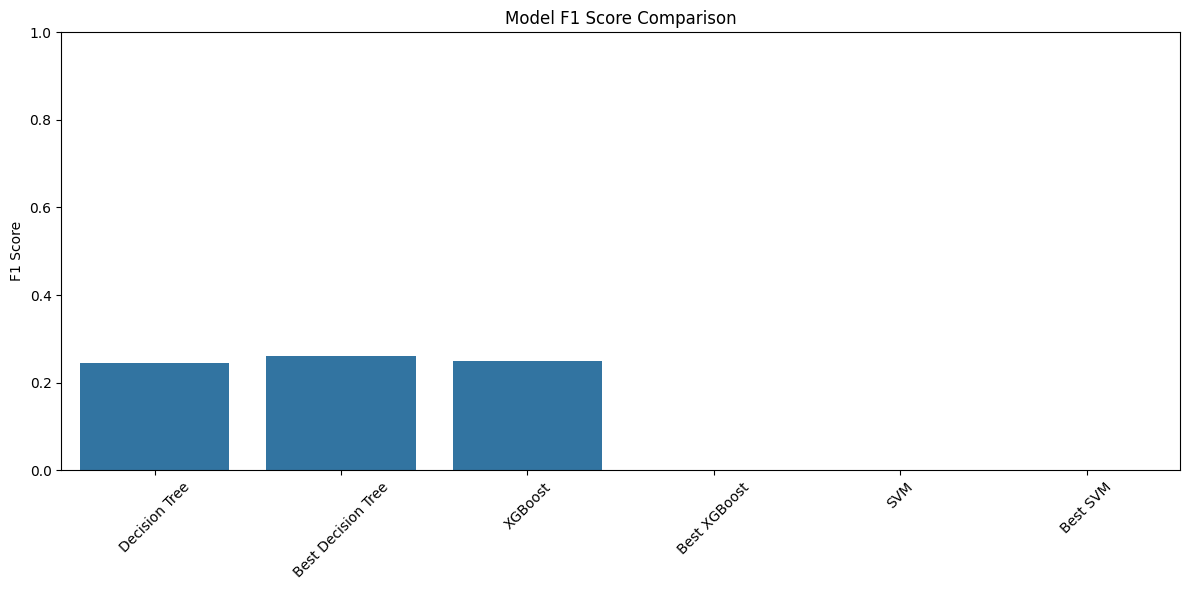

In [ ]:
# Calculate F1 scores for each model
f1_dt = f1_score(y_test, y_pred_dt)
f1_best_dt = f1_score(y_test, y_pred_best_dt)
f1_xgb = f1_score(y_test, y_pred_xgb)
f1_best_xgb = f1_score(y_test, y_pred_best_xgb)
f1_svm = f1_score(y_test, y_pred_svm)
f1_best_svm = f1_score(y_test, y_pred_best_svm)

f1_scores = [f1_dt, f1_best_dt, f1_xgb, f1_best_xgb, f1_svm, f1_best_svm]

plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=f1_scores)
plt.ylim(0, 1)
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

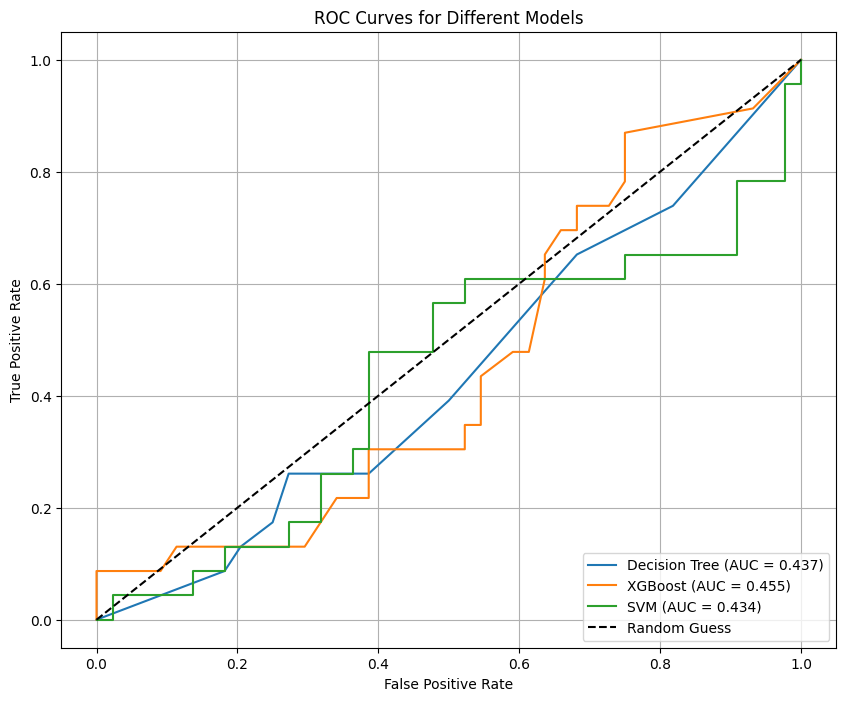

In [ ]:
# ROC curves for all models
plt.figure(figsize=(10, 8))

# Decision Tree
y_pred_proba_dt = best_dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')

# XGBoost
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')

# SVM
y_pred_proba_svm = best_svm_model.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.3f})')

# Random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 9. Prediction on New Data

In [ ]:
def predict_project_status(progress, hours_spent, priority, project_type):
    # Encode priority
    priority_map = {i: label for i, label in enumerate(priority_encoder.classes_)}
    priority_encoded = priority_encoder.transform([priority])[0]
    
    # Encode project type
    project_type_encoded = project_type_encoder.transform([[project_type]])[0]
    
    # Create feature array
    features_array = np.array([[progress, hours_spent, priority_encoded] + list(project_type_encoded)])
    
    # Scale features for SVM
    features_scaled = scaler.transform(features_array)
    
    # Make predictions
    dt_prediction = best_dt_model.predict(features_array)[0]
    dt_proba = best_dt_model.predict_proba(features_array)[0]
    
    xgb_prediction = best_xgb_model.predict(features_array)[0]
    xgb_proba = best_xgb_model.predict_proba(features_array)[0]
    
    svm_prediction = best_svm_model.predict(features_scaled)[0]
    svm_proba = best_svm_model.predict_proba(features_scaled)[0]
    
    # Map predictions to labels
    dt_label = "On Track" if dt_prediction == 1 else "Behind/On Hold"
    xgb_label = "On Track" if xgb_prediction == 1 else "Behind/On Hold"
    svm_label = "On Track" if svm_prediction == 1 else "Behind/On Hold"
    
    # Print results
    print(f"Project Features:")
    print(f"  - Progress: {progress}")
    print(f"  - Hours Spent: {hours_spent}")
    print(f"  - Priority: {priority}")
    print(f"  - Project Type: {project_type}")
    print("\nPrediction Results:")
    print(f"  - Decision Tree Prediction: {dt_label} (Confidence: {max(dt_proba):.2f})")
    print(f"  - XGBoost Prediction: {xgb_label} (Confidence: {max(xgb_proba):.2f})")
    print(f"  - SVM Prediction: {svm_label} (Confidence: {max(svm_proba):.2f})")
    
    return {
        'dt_prediction': dt_label,
        'dt_confidence': max(dt_proba),
        'xgb_prediction': xgb_label,
        'xgb_confidence': max(xgb_proba),
        'svm_prediction': svm_label,
        'svm_confidence': max(svm_proba)
    }

In [ ]:
# Example 1: A project with high progress and low hours spent
predict_project_status(progress=0.8, hours_spent=10, priority='High', project_type='Renovation')

Project Features:
  - Progress: 0.8
  - Hours Spent: 10
  - Priority: High
  - Project Type: Renovation

Prediction Results:
  - Decision Tree Prediction: Behind/On Hold (Confidence: 0.75)
  - XGBoost Prediction: Behind/On Hold (Confidence: 0.68)
  - SVM Prediction: Behind/On Hold (Confidence: 0.63)


c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


{'dt_prediction': 'Behind/On Hold',
 'dt_confidence': np.float64(0.75),
 'xgb_prediction': 'Behind/On Hold',
 'xgb_confidence': np.float32(0.6790804),
 'svm_prediction': 'Behind/On Hold',
 'svm_confidence': np.float64(0.6271027755626004)}

In [ ]:
# Example 2: A project with low progress and high hours spent
predict_project_status(progress=0.2, hours_spent=35, priority='Medium', project_type='Construction')

Project Features:
  - Progress: 0.2
  - Hours Spent: 35
  - Priority: Medium
  - Project Type: Construction

Prediction Results:
  - Decision Tree Prediction: Behind/On Hold (Confidence: 1.00)
  - XGBoost Prediction: Behind/On Hold (Confidence: 0.76)
  - SVM Prediction: Behind/On Hold (Confidence: 0.64)


c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\Desktop\ml project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


{'dt_prediction': 'Behind/On Hold',
 'dt_confidence': np.float64(1.0),
 'xgb_prediction': 'Behind/On Hold',
 'xgb_confidence': np.float32(0.7593833),
 'svm_prediction': 'Behind/On Hold',
 'svm_confidence': np.float64(0.6419072369881988)}